In [2]:
import os
import matplotlib.pyplot

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  25%|██▌       | 1/4 [00:00<00:01,  2.34 url/s]

Dl Completed...:  50%|█████     | 2/4 [00:00<00:00,  4.14 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  1.92 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:01<00:00,  1.91 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.79 url/s]


Dataset mnist downloaded and prepared to C:\Users\kalgh\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [4]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\kalgh\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


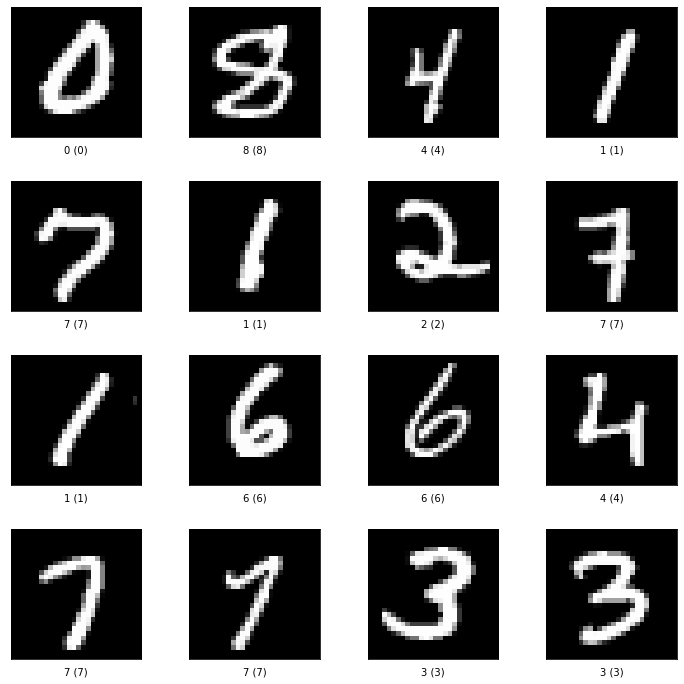

In [5]:
fig = tfds.show_examples(ds_train,ds_info, rows=4, cols=4)

In [7]:
def normalize_img(image, label):
    # Normalize the image
    return tf.cast(image, tf.float32)/ 255.0, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

# Setup for train dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)   # Number of parallel calls
ds_train = ds_train.cache() # Cache for training
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples) # Number of samples performing shuffle_files  for training
ds_train = ds_train.batch(BATCH_SIZE) # Number of batches for training
ds_train = ds_train.prefetch(AUTOTUNE) # Prefetches the datasets for training

# Setup for test Dataset
ds_test = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE) 
ds_test = ds_train.batch(128)
ds_test = ds_train.prefetch(AUTOTUNE)

In [8]:
model = keras.Sequential(
    [
        keras.Input((28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=5, verbose=2)
model.evaluate(ds_test)

Epoch 1/5
469/469 - 8s - loss: 0.2558 - accuracy: 0.9281
Epoch 2/5
469/469 - 1s - loss: 0.0881 - accuracy: 0.9753
Epoch 3/5
469/469 - 1s - loss: 0.0626 - accuracy: 0.9822
Epoch 4/5
469/469 - 1s - loss: 0.0483 - accuracy: 0.9859
Epoch 5/5
469/469 - 1s - loss: 0.0404 - accuracy: 0.9881
469/469 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9922


[0.030371930450201035, 0.9922333359718323]